In [1]:
# 标准化 normalization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.6.2
keras.api._v2.keras 2.6.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train), np.min(x_train))

255 0


In [4]:
x_train.reshape(-1, 1).shape

(43120000, 1)

In [5]:
# x = (x - μ) / std
# 通过原有sk的标准化进行处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# x_train: [None, 28, 28] -> [None, 784]
# 先reshape变为二维（相当于1列）的目的是对每一个像素点进行标准化（让其等价）
# 然后再将结构复原（55000, 28, 28）
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

# 这个是验证集，验证集用的也是训练集的均值和方差
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

# 这个是测试集
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [6]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [15]:
# tf.keras.models.Sequential()

"""
# 另一种方式
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # 展平层
    keras.layers.Dense(100, activation='relu'),  # 超参数300可调，激活函数可调
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 目标函数softmax，适用于分类问题，将输出值变为概率
])

# relu: y = max(0, x)
# softmax: 将向量变为概率分布，x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]  多分类问题
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(0.001),  # 优化器是 学习率变化 的算法
             metrics=["accuracy"])

In [16]:
# 如果再次直接fit是接着之前的进行训练的，如果要从头训练，要重新执行上面代码
history = model.fit(x_train_scaled, y_train, epochs=20,
                   validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0420 - accuracy: 0.6691 - val_loss: 0.6967 - val_accuracy: 0.7638
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6390 - accuracy: 0.7794 - val_loss: 0.5743 - val_accuracy: 0.7970
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5557 - accuracy: 0.8040 - val_loss: 0.5229 - val_accuracy: 0.8156
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5143 - accuracy: 0.8179 - val_loss: 0.4913 - val_accuracy: 0.8274
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4878 - accuracy: 0.8267 - val_loss: 0.4696 - val_accuracy: 0.8354
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4687 - accuracy: 0.8328 - val_loss: 0.4568 - val_accuracy: 0.8400
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4534 - accuracy: 0.8375 - val_loss: 0.4441 - val_accuracy:

In [17]:
print(type(history.history))
print(history.history)

<class 'dict'>
{'loss': [1.041986346244812, 0.6389613151550293, 0.5556644797325134, 0.5142748951911926, 0.4878493547439575, 0.4687194526195526, 0.45340198278427124, 0.44077742099761963, 0.43022286891937256, 0.42107003927230835, 0.4131822884082794, 0.4059796929359436, 0.39967280626296997, 0.3935428559780121, 0.3881371021270752, 0.3832540214061737, 0.3784952759742737, 0.3744893968105316, 0.37018853425979614, 0.366357684135437], 'accuracy': [0.6691454648971558, 0.7793818116188049, 0.8039818406105042, 0.8178545236587524, 0.8267090916633606, 0.832836389541626, 0.8374909162521362, 0.8428363800048828, 0.8460000157356262, 0.8500545620918274, 0.852509081363678, 0.8557636141777039, 0.857236385345459, 0.8599636554718018, 0.8621090650558472, 0.8639090657234192, 0.8653818368911743, 0.8668727278709412, 0.8679817914962769, 0.8699272871017456], 'val_loss': [0.6967434883117676, 0.5742730498313904, 0.522861123085022, 0.49132025241851807, 0.4696308970451355, 0.45682084560394287, 0.44412657618522644, 0.43

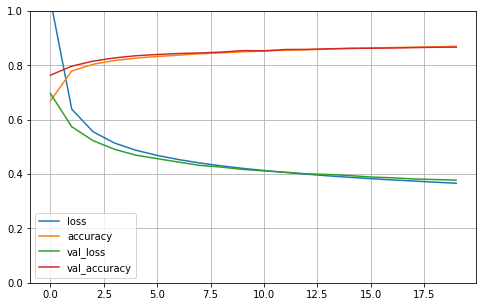

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [19]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.4116840362548828, 0.8525000214576721]